# Async - Sci Kit Learn

This week we will see how easy ML can be using a library. SciKit Learn will automate the same work we did last week. We'll even use the same dataset! 

Let's start by importing our dependencies and dataset. 

In [58]:
# Import dependancies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error 

# Load the dataset
fulldataset = pd.read_csv('../datasets/AirportTemps.csv')
dataset = fulldataset.dropna()


We'll 'shape' the data, so that the y_train data (the labels) are in a series, and the X data (the training values) are in a 2D array.

In [59]:
# Setting up our values (x) and our training labels (y_train)
x = dataset['MaxTempSydneyAirport']
y_train = dataset['MaxTempNewcastleAirport']
#Scikit expects a 2D array for 'features', even though we are only using one feature here
X = x.values.reshape(-1, 1) 

Now we will instantiate a LinearRegression model and fit the model to our data.

In [60]:
#Instantiating the model
airport_regression = LinearRegression()
# Now we train the model - in just one line! 
airport_regression.fit(X,y_train)

LinearRegression()

We can now predict values based on this model, then plot our predictions.

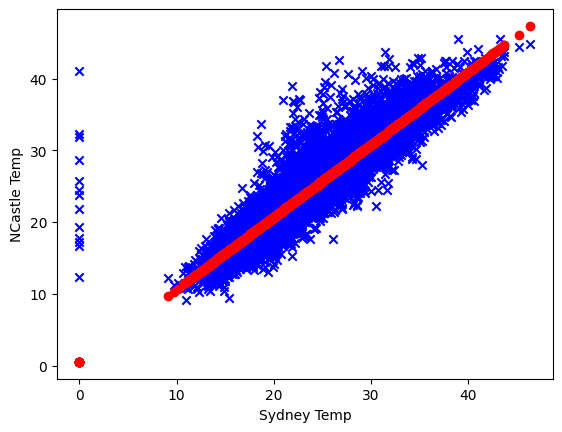

In [61]:
y_predictions = airport_regression.predict(X)

plt.scatter(X, y_train, marker='x', color='b')
plt.scatter(X, y_predictions, color='r')
plt.xlabel('Sydney Temp')
plt.ylabel('NCastle Temp')
plt.show()

Let's evaluate the model too. 

In [62]:
errors = abs(y_predictions - y_train)
errors_squared = errors * errors
mae = errors.mean()
mse = errors_squared.mean()
print(f'The mean average error is {mae:.2} degrees C; the mean squared error is {mse:.2}.')

The mean average error is 1.3 degrees C; the mean squared error is 3.6.


## Your Challenge

Go ahead and create a linear regression model using the tax data from last week. Choose whichever value you wish to train your model on.

In [64]:
# Load the dataset
dataset = pd.read_csv('../datasets/taxstats2015individual28countaveragemedianbypostcode.csv')
dataset.head()

,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
0,2000,36185,47723,18213,31293,38710,17992,3614,558,207,...,19684,1331,222191,20773,17264,27555,5917,51394,68531,1110
1,2006,83,80905,58150,74,82733,67658,21,1042,-807,...,42054,4,48971,18508,67,28142,19359,137,90315,15544
2,2007,4769,46549,31474,4153,47386,34366,548,-1242,-794,...,19960,334,639499,9233,3071,15649,9115,6711,41670,5225
3,2008,5607,108816,41151,5008,53418,42892,612,1818,-1728,...,19722,481,32173,9385,4061,53976,10583,7676,54245,10373
4,2009,9726,82938,50604,8167,74068,55243,1714,-2412,-1520,...,26044,666,222993,11982,7358,32430,14835,12718,126486,20494


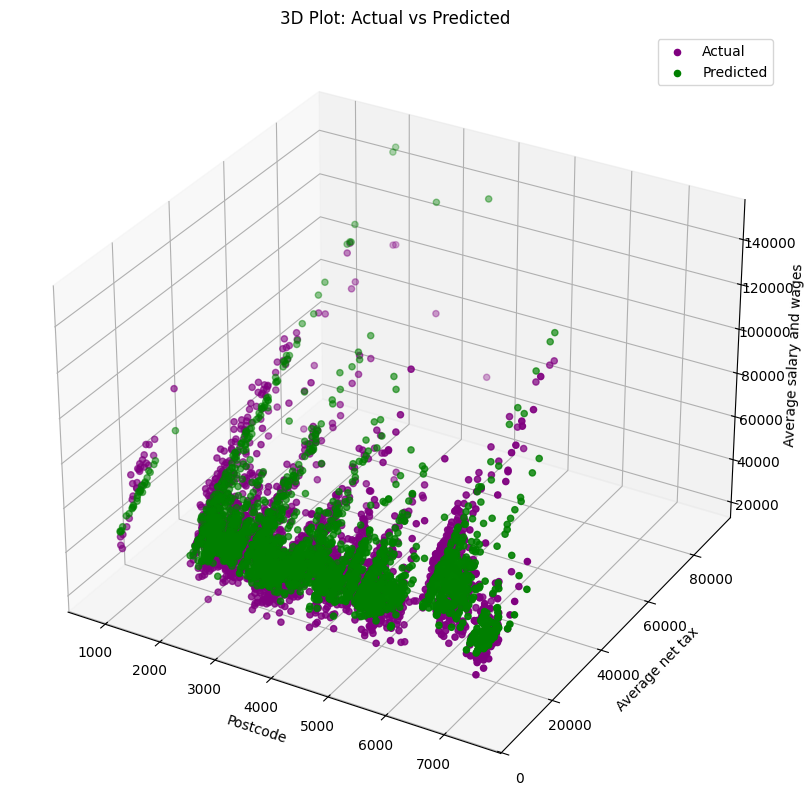

The mean average error is $5.1e+03; the mean squared error is 5.4e+07.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error 

fulldataset = pd.read_csv('../datasets/taxstats2015individual28countaveragemedianbypostcode.csv')
dataset = fulldataset.dropna()
x = dataset[['Average net tax', 'Postcode']]
y_train = dataset['Average salary and wages']
tax_regression = LinearRegression()
tax_regression.fit(x,y_train)
y_predictions = tax_regression.predict(x)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Postcode'], X['Average net tax'], y_train, color='purple', label='Actual')
ax.scatter(X['Postcode'], X['Average net tax'], y_predictions, color='green', label='Predicted')
ax.set_xlabel('Postcode')
ax.set_ylabel('Average net tax')
ax.set_zlabel('Average salary and wages')
ax.legend()
plt.show()

errors = abs(y_predictions - y_train)
errors_squared = errors * errors
mae = errors.mean()
mse = errors_squared.mean()
print(f'The mean average error is ${mae:.2}; the mean squared error is {mse:.2}.')